In [97]:
import numpy as np                              #Version 1.21.4
import pandas as pd                             #Version 1.3.4
import matplotlib.pyplot as plt                 #Version 3.5.0

import plotly.express as px                     #Version 5.4.0

from IPython.display import display             #Version 7.30.0
import ipywidgets as widgets                    #Version 7.6.5
from ipywidgets import interact, Layout         #Verison 7.6.5

import folium                                   #Version 0.12.1.post1

In [108]:
#Daten einlesen
url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)

de_altersstruktur = f"{url}/bund-covid-altersstruktur-zeitreihe_ab-2021-04-29.csv"
bl_altersstruktur_icu = f"{url}/zeitreihe-bundeslaender.csv"
lk_altersstruktur_icu = f"{url}/2021-12-19_12-15_teilbare_divi_daten.csv"
de_hospi = f"{url}/DE_Hospi_2.csv"
bl_impfungen = f"{url}/Aktuell_Deutschland_Impfquoten_COVID-19.csv"
bl_altersstruktur_icu_data = pd.read_csv(bl_altersstruktur_icu)
de_altersstruktur_data = pd.read_csv(de_altersstruktur)
lk_altersstruktur_icu_data = pd.read_csv(lk_altersstruktur_icu)
de_hospi_data = pd.read_csv(de_hospi)
bl_impfungen_data = pd.read_csv(bl_impfungen)

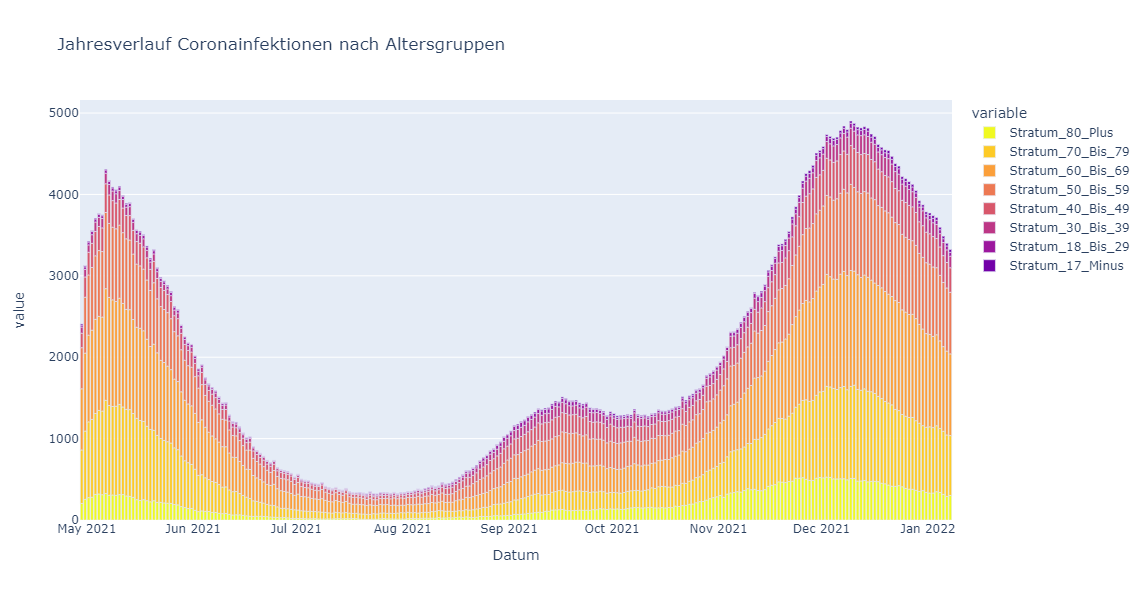

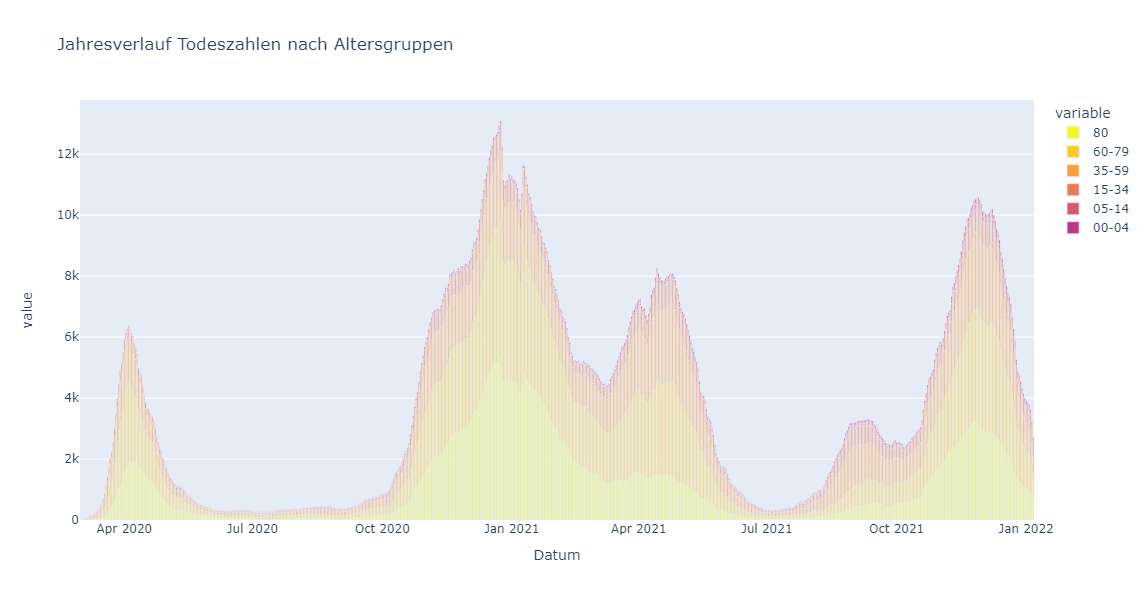

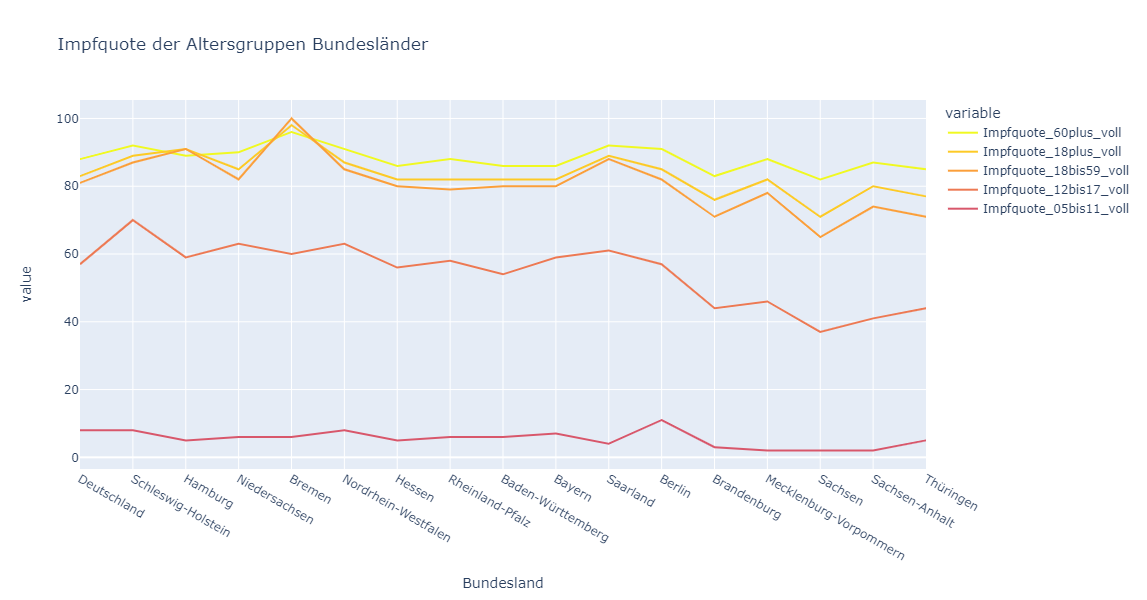

In [109]:
#Corona allgemein Deutschland 

#Jahresverlauf Corona
fig1 = px.bar(de_altersstruktur_data, x="Datum", y=['Stratum_80_Plus', 'Stratum_70_Bis_79', 'Stratum_60_Bis_69', 'Stratum_50_Bis_59', 'Stratum_40_Bis_49', 'Stratum_30_Bis_39', 'Stratum_18_Bis_29', 'Stratum_17_Minus'], 
                color_discrete_sequence= px.colors.sequential.Plasma_r,
                title="Jahresverlauf Coronainfektionen nach Altersgruppen", height=600, width=1000)
fig1.show()

#Jahresverlauf Todeszahlen
fig2 = px.bar(de_hospi_data, x="Datum", y=['80', '60-79', '35-59', '15-34', '05-14', '00-04'], 
                color_discrete_sequence= px.colors.sequential.Plasma_r,
                title="Jahresverlauf Todeszahlen nach Altersgruppen", height=600, width=1000)
fig2.show()

#Impfquote Bundesländer
fig3 = px.line(bl_impfungen_data, x="Bundesland", y=['Impfquote_60plus_voll', 'Impfquote_18plus_voll', 'Impfquote_18bis59_voll', 'Impfquote_12bis17_voll', 'Impfquote_05bis11_voll'], 
                color_discrete_sequence= px.colors.sequential.Plasma_r,
                title="Impfquote der Altersgruppen Bundesländer", height=600, width=1000)
fig3.show()

In [110]:
#Windrose Hospitalisierung mit Altersstruktur der Landkreise pro Bundesländer

def fkt_plot_bl(bl_nummer):
    bl_altersgruppen = lk_altersstruktur_icu_data.bundesland == bl_nummer
    x = lk_altersstruktur_icu_data[bl_altersgruppen]
    fig = px.bar_polar(lk_altersstruktur_icu_data[bl_altersgruppen], r="verh_frei_belegt", theta="%s"%("gemeindeschluessel"), color="Anteil ueber 65-Jaehrigen", 
                       color_discrete_sequence= px.colors.sequential.Plasma_r,
                       title="Verhältnis freie und belegte Intensivbetten der Landkreise sortiert nach demographischen Alterung"
                      )
    fig.show()

widgets.interact(fkt_plot_bl, bl_nummer=[('Schleswig-Holstein', 1), ('Hamburg', 2), ('Niedersachsen', 3), ('Bremen', 4), ('Nordrhein-Westfalen', 5), ('Hessen', 6), ('Rheinland-Pfalz', 7), ('Baden-Württemberg', 8), ('Bayern', 9), ('Saarland', 10), ('Berlin', 11), ('Brandenburg', 12), ('Mecklenburg-Vorpommern', 13), ('Sachsen', 14), ('Sachsen-Anhalt', 15), ('Thüringen', 16)])

interactive(children=(Dropdown(description='bl_nummer', options=(('Schleswig-Holstein', 1), ('Hamburg', 2), ('…

<function __main__.fkt_plot_bl(bl_nummer)>

In [111]:
#Säulendiagramm Hospitalisierung mit Altersstruktur der Landkreise pro Bundesländer

def fkt_plot_bl(bl_nummer):
    bl_altersgruppen = lk_altersstruktur_icu_data.bundesland == bl_nummer
    x = lk_altersstruktur_icu_data[bl_altersgruppen]
    fig = px.bar(lk_altersstruktur_icu_data[bl_altersgruppen], y="verh_frei_belegt", x="%s"%("gemeindeschluessel"), color="Anteil ueber 65-Jaehrigen", 
                       #color_discrete_sequence= px.colors.sequential.Plasma_r,
                       title="Verhältnis freie und belegte Intensivbetten der Landkreise sortiert nach demographischen Alterung"
                      )
    fig.update_layout(
        title="Verhältnis freie und belegte Intensivbetten der Landkreise sortiert nach demographischen Alterung",
        xaxis_title="Gemeindeschlüssel",
        yaxis_title="Belegte Intensivbetten [%]",
        legend_title="Legend Title",
    )
    fig.show()

widgets.interact(fkt_plot_bl, bl_nummer=[('Schleswig-Holstein', 1), ('Hamburg', 2), ('Niedersachsen', 3), ('Bremen', 4), ('Nordrhein-Westfalen', 5), ('Hessen', 6), ('Rheinland-Pfalz', 7), ('Baden-Württemberg', 8), ('Bayern', 9), ('Saarland', 10), ('Berlin', 11), ('Brandenburg', 12), ('Mecklenburg-Vorpommern', 13), ('Sachsen', 14), ('Sachsen-Anhalt', 15), ('Thüringen', 16)])

interactive(children=(Dropdown(description='bl_nummer', options=(('Schleswig-Holstein', 1), ('Hamburg', 2), ('…

<function __main__.fkt_plot_bl(bl_nummer)>

In [121]:
#Balkendiagramm von jedem Landkreis für Todes- und Coronafälle jeder Altersgruppe

#Daten einlesen
url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)

col_list1 = ["A", "Altersgruppe", "AnzTodesfall100kM", "AnzTodesfall100kW", "AnzFall100kM"]

de_lk = f"{url}/RKI_Corona_Landkreise/RKI_Corona_Landkreise.geojson"
de_altersgruppen = f"{url}/RKI_Altersgruppen.csv"
de_altersgruppen_data = pd.read_csv(de_altersgruppen, usecols=col_list1)

col_list2 = ["AdmUnitId,N,5,0"]
de_lk_nr = f"{url}/RKI_Corona_Landkreise_tb.csv"
de_lk_nr_data = pd.read_csv(de_lk_nr, usecols=col_list2)

#Ausgabe Plot nach LK
def fkt_plot_lk(lk_nummer):
        lk_altersgruppen = de_altersgruppen_data.A == lk_nummer
        lk_data = de_altersgruppen_data[lk_altersgruppen]

        #Definieren der x- und y-Grenzen
        y = range(0, len(lk_data))
        x_tot = lk_data['AnzTodesfall100kM']
        x_fall = lk_data['AnzFall100kM']

        #Plotparameter definieren
        fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

        # Hintergrundfarbe und Plot-Titel angeben
        fig.patch.set_facecolor('xkcd:white')
        plt.figtext(.5,.9,"Vergleich Landkreise", fontsize=15, ha='center')

        # Todes und Fälle Balken definieren
        axes[0].barh(y, x_tot, align='center', color=px.colors.qualitative.G10)
        axes[0].set(title='Todesfälle')
        axes[1].barh(y, x_fall, align='center', color=px.colors.qualitative.G10)
        axes[1].set(title='Coronafälle')

        # Rasterparameter und Beschriftungen für die y-Achse an
        axes[1].grid()
        axes[0].set(yticks=y, yticklabels=lk_data['Altersgruppe'])
        axes[0].invert_xaxis()
        axes[0].grid()
        
        # ax = plt.gca()
        # axes[0].set_xlim([2000, 0])
        # axes[1].set_xlim([0, 18182])

        #Plot anzeigen
        plt.show()
        
widgets.interact(fkt_plot_lk, lk_nummer=de_lk_nr_data["AdmUnitId,N,5,0"])

interactive(children=(Dropdown(description='lk_nummer', options=(1001, 1002, 1003, 1004, 1051, 1053, 1054, 105…

<function __main__.fkt_plot_lk(lk_nummer)>

In [122]:
#Balkendiagramme von 2 Landkreisen der Todesfälle jeder Altersgruppe

#Daten einlesen
url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)

col_list1 = ["A", "Altersgruppe", "AnzTodesfall100kM", "AnzTodesfall100kW", "AnzTodesfall100k"]

de_lk = f"{url}/RKI_Corona_Landkreise/RKI_Corona_Landkreise.geojson"
de_altersgruppen = f"{url}/RKI_Altersgruppen.csv"
de_altersgruppen_data = pd.read_csv(de_altersgruppen, usecols=col_list1)

col_list2 = ["AdmUnitId,N,5,0"]
de_lk_nr = f"{url}/RKI_Corona_Landkreise_tb.csv"
de_lk_nr_data = pd.read_csv(de_lk_nr, usecols=col_list2)

#Ausgabe Plot nach LK
def fkt_plot_lk2(lk_nummer1, lk_nummer2):
        lk_altersgruppen1 = de_altersgruppen_data.A == lk_nummer1
        lk_data1 = de_altersgruppen_data[lk_altersgruppen1]
        lk_altersgruppen2 = de_altersgruppen_data.A == lk_nummer2
        lk_data2 = de_altersgruppen_data[lk_altersgruppen2]

        #Definieren der x- und y-Grenzen
        y = range(0, len(lk_data2))
        x_1 = lk_data1['AnzTodesfall100k']
        x_2 = lk_data2['AnzTodesfall100k']

        #Plotparameter definieren
        fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

        # Hintergrundfarbe und Plot-Titel angeben
        fig.patch.set_facecolor('xkcd:white')
        plt.figtext(.5,.9,"Sterbefälle", fontsize=15, ha='center')

        # ersten und zweiten Balken definieren
        axes[0].barh(y, x_1, align='center', color=px.colors.qualitative.G10)
        axes[0].set(title='Landkreis 1')
        axes[1].barh(y, x_2, align='center', color=px.colors.qualitative.G10)
        axes[1].set(title='Landkreis 2')

        # Rasterparameter und Beschriftungen für die y-Achse an
        axes[1].grid()
        axes[0].set(yticks=y, yticklabels=lk_data1['Altersgruppe'])
        axes[0].invert_xaxis()
        axes[0].grid()
        
        ax = plt.gca()
        axes[0].set_xlim([4000, 0])
        axes[1].set_xlim([0, 4000])

        #Plot anzeigen
        plt.show()

widgets.interact(fkt_plot_lk2, lk_nummer1=de_lk_nr_data["AdmUnitId,N,5,0"],
                              lk_nummer2=de_lk_nr_data["AdmUnitId,N,5,0"])

interactive(children=(Dropdown(description='lk_nummer1', options=(1001, 1002, 1003, 1004, 1051, 1053, 1054, 10…

<function __main__.fkt_plot_lk2(lk_nummer1, lk_nummer2)>

In [114]:
#Balkendiagramme von 2 Landkreisen, links nur junge, rechts nur alte, der Todesfälle jeder Altersgruppe

url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)
lk_jung = f"{url}/Alter_jung.csv"
lk_alt = f"{url}/Alter_alt.csv"
lk_jung_data = pd.read_csv(lk_jung)  
lk_alt_data = pd.read_csv(lk_alt)
widgets.interact(fkt_plot_lk2, lk_nummer1=lk_jung_data["A"],
                              lk_nummer2=lk_alt_data["A"])

interactive(children=(Dropdown(description='lk_nummer1', options=(1001, 1002, 1053, 1056, 1060, 2000, 3101, 31…

<function __main__.fkt_plot_lk2(lk_nummer1, lk_nummer2)>

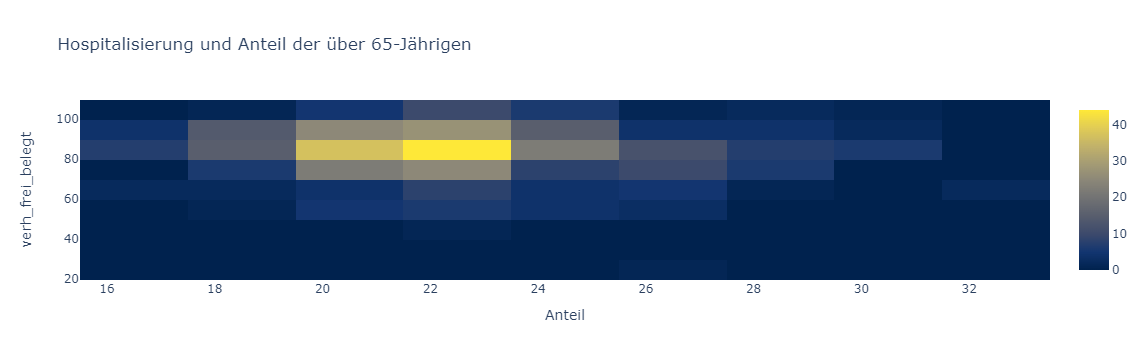

In [115]:
#Density Heatmap für Hospitalisierun gund Alterung

url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)

col_list2 = ["A", "verh_frei_belegt", "Anteil", "betten_frei"]

lk_altersstruktur_icu = f"{url}/2021-12-19_12-15_teilbare_divi_daten2.csv"
df = pd.read_csv(lk_altersstruktur_icu, usecols=col_list2)

fig = px.density_heatmap(df, x="Anteil", y="verh_frei_belegt", labels=dict(x="Anteil der über 65-Jährigen", y="Hospitalisierung"), title="Hospitalisierung und Anteil der über 65-Jährigen")
fig.update_traces(dict(colorscale='cividis',showscale=True,coloraxis=None),)
fig.show()

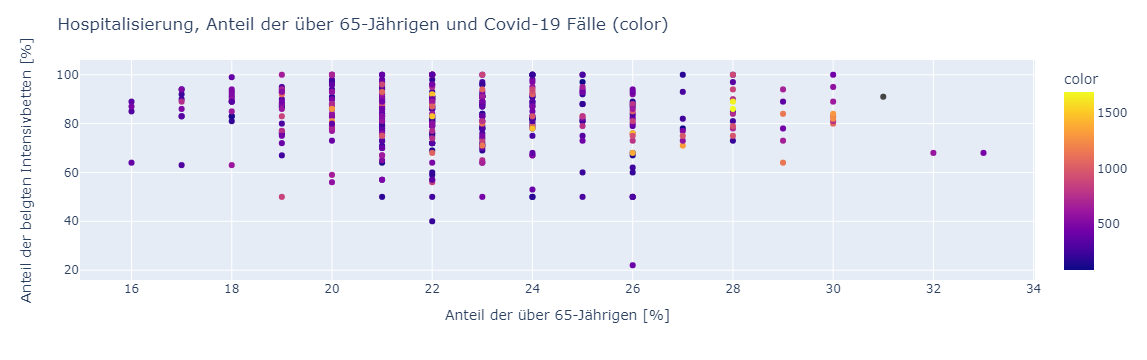

In [116]:
#Scatterplot Hospitalisierung und Alterung + farbliche Darstellung der Fälle

col_list2 = ["RS,C,5", "cases7_p_1,C,6"]

lk_infektionen = f"{url}/RKI_Corona_Landkreise.csv"
lk_infektionen_data = pd.read_csv(lk_infektionen, usecols=col_list2)

fig = px.scatter(df, x=df.Anteil, y=df.verh_frei_belegt, color=lk_infektionen_data["cases7_p_1,C,6"])

fig.update_layout(
    title="Hospitalisierung, Anteil der über 65-Jährigen und Covid-19 Fälle (color)",
    xaxis_title="Anteil der über 65-Jährigen [%]",
    yaxis_title="Anteil der belgten Intensivbetten [%]",
    legend_title="Covid-19 Fälle",
)

fig.show()

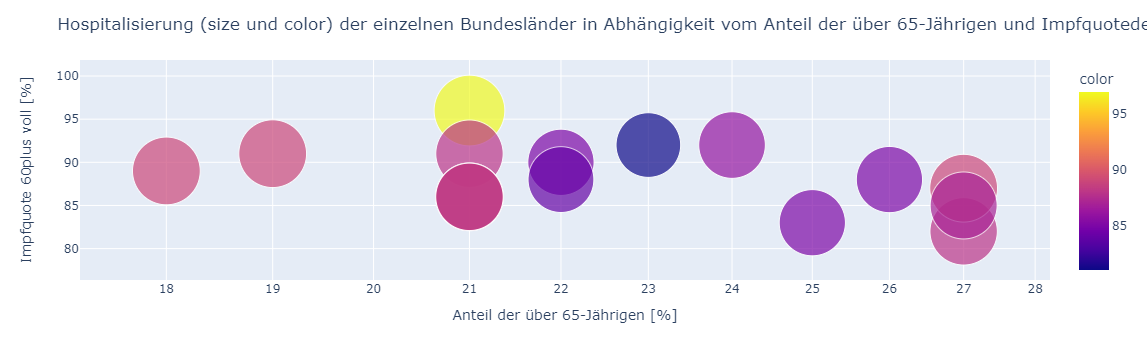

In [117]:
#Bubbles Hospitalisierung, Anteil und Impfung

url = (
    "https://raw.githubusercontent.com/Leonieen/COVID19/main/Daten"
)
bl_df = f"{url}/d_bl_anteil_65.csv"
bl_df_data = pd.read_csv(bl_df)
bl_df_data

fig = px.scatter(x=bl_df_data.Anteil, y=bl_df_data.Impfquote_60plus_voll,
                 size=bl_df_data.Verh_betten_belegt, color=bl_df_data.Verh_betten_belegt,
                 hover_name=bl_df_data.Name, log_x=True, size_max=50)

fig.update_layout(
    title="Hospitalisierung (size und color) der einzelnen Bundesländer in Abhängigkeit vom Anteil der über 65-Jährigen und Impfquoteder über 60-Jährigen",
    xaxis_title="Anteil der über 65-Jährigen [%]",
    yaxis_title="Impfquote 60plus voll [%]",
    legend_title="Covid-19 Fälle",
)

fig.show()